<a href="https://colab.research.google.com/github/gaurav7916/gaurav7916.github.io/blob/main/Assumptions_of_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
housing = pd.read_csv("https://raw.githubusercontent.com/sheshanth123/datasets/main/Housing.csv")

In [ ]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Inspect the various aspects of the housing dataframe

In [ ]:
housing.shape

(545, 13)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Step 2: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [ ]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [ ]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Dummy Variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well.

For this, we will use something called `dummy variables`.

In [ ]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [ ]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where —
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [ ]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [ ]:
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)

In [ ]:
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [ ]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Step 3: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [ ]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

## Step 4: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [ ]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
# Check the parameters obtained

lr.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [ ]:
import matplotlib.pyplot as plt

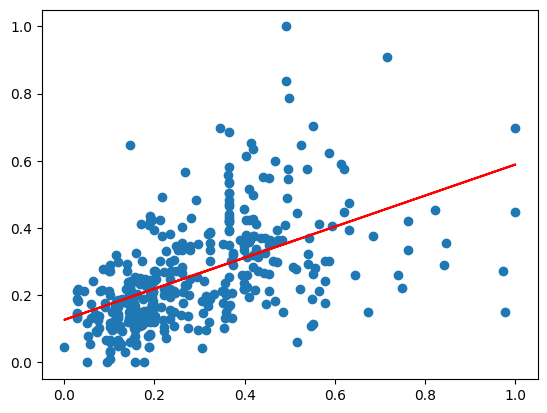

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [ ]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           8.83e-83
Time:                        02:46:51   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

In [ ]:
import seaborn as sns

## Assumptions of LR

**Linearity**: This is checked by creating a scatter plot of observed vs. predicted values. If the points are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

**Normality** of the residuals: This is checked by creating a histogram or a Q-Q-Plot. Normality can be checked with a goodness of fit test, e.g., the Kolmogorov-Smirnov test. When the data is not normally distributed a non-linear transformation might fix this issue.

**Homoscedasticity**: This is checked by looking at the scatter plot and the residuals vs. predicted values. If heteroscedasticity is present, a non-constant variance in the error terms, the confidence intervals will be too wide or too narrow.

Multicollinearity: Variance Inflation Factor (VIF) is used to check the multicollinearity of the features. VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. In that case, consider dropping the variable with the highest VIF and rerun the test.

### Check for Linearity

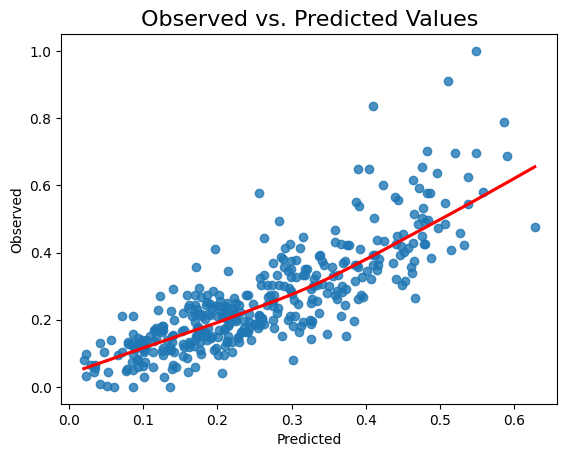

In [ ]:
# Check for Linearity
fitted_values = lr.predict()
sns.regplot(x=fitted_values, y=y_train, lowess=True, line_kws={'color': 'red'})
plt.title('Observed vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()

The scatter plot titled “Observed vs. Predicted Values” shows a general trend of increasing observed values with increasing predicted values, indicating a degree of linearity. However, there is noticeable scatter around the red line of best fit, suggesting that the linear model may not perfectly capture the relationship between observed and predicted values.

Here are some suggestions based on the observation:

Non-linear Models: It might be beneficial to explore if a non-linear model could provide a better fit. This could help capture the complexity of the data that a linear model might miss.

Additional Variables: Including additional variables in the model could help improve the fit. These could be interaction terms or other predictors that have not been considered yet.

Residual Analysis: Conduct a residual analysis to check the assumptions of linear regression. If the residuals do not follow a normal distribution or if they exhibit patterns, it might indicate that the linear model is not a good fit.

Regularization Techniques: Consider using regularization techniques like Ridge or Lasso regression. These techniques can help prevent overfitting by penalizing large coefficients.

### Check for Normality of Residuals

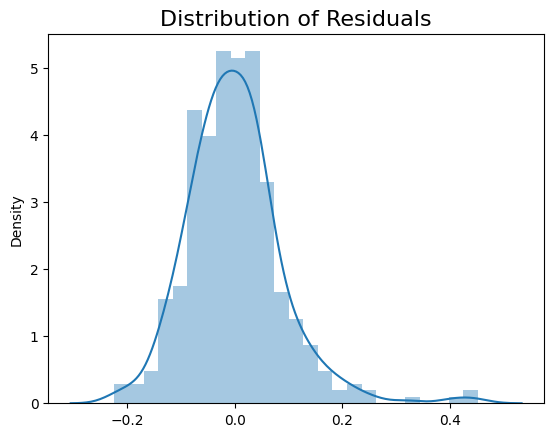

In [ ]:
# Check for Normality of Residuals
residuals = lr.resid
sns.distplot(residuals)
plt.title('Distribution of Residuals', fontsize=16)
plt.show()

The residuals appear to be normally distributed, as indicated by the bell-shaped curve. However, there are some deviations from perfect normality, such as slight irregularities in the shape of the distribution.

Here are some suggestions to improve the normality of residuals:

Transforming the Dependent Variable: Consider transforming the dependent variable using methods like log, square root, or inverse transformations. This can help in achieving normality if the residuals are not normally distributed.

Adding Explanatory Variables: If the residuals are not normally distributed, it might be due to some effect not captured by the explanatory variables in the model. Adding relevant variables might help in capturing this effect and improving the normality of residuals.

Non-linear Models: If the relationship between the dependent and independent variables is not linear, using non-linear models like polynomial regression or generalized linear models might help in improving the normality of residuals.

Outlier Treatment: Outliers can significantly impact the distribution of residuals. Identifying and appropriately treating outliers could help in achieving normality.

### Check for Homoscedasticity

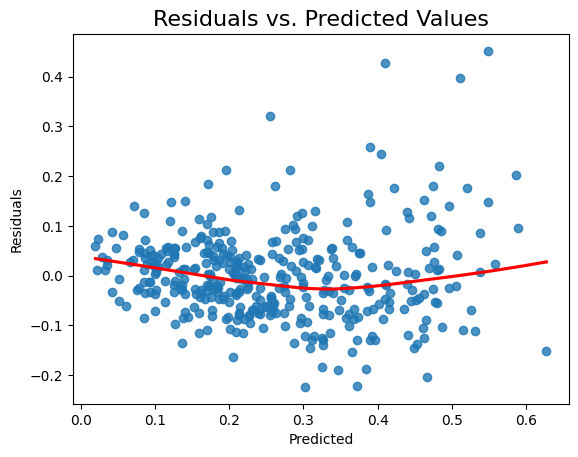

In [ ]:
# Check for Homoscedasticity
sns.regplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

The spread of residuals doesn’t seem to be constant across all levels of the independent variable, indicating homoscedasticity issues. This is evident from the concentration of blue dots around the 0 value on the y-axis but they are not evenly distributed along the x-axis.

Here are some suggestions to address the issue of homoscedasticity:

Transforming the Dependent Variable: Consider transforming the dependent variable using methods like log, square root, or inverse transformations. This can help in achieving homoscedasticity if the residuals are not evenly spread.

Adding Missing Variables: If the residuals are not evenly spread, it might be due to some effect not captured by the explanatory variables in the model. Adding relevant variables might help in capturing this effect and improving the homoscedasticity of residuals.

Weighted Least Squares: If the variance of the residuals is not constant, using weighted least squares instead of ordinary least squares for estimation might help in improving the homoscedasticity of residuals.

### Check for Multicollinearity

In [ ]:
# Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif.round(1))

    VIF Factor         features
0          4.7             area
1          7.3         bedrooms
2          1.7        bathrooms
3          2.7          stories
4          6.0         mainroad
5          1.5        guestroom
6          2.0         basement
7          1.1  hotwaterheating
8          1.8  airconditioning
9          2.1          parking
10         1.5         prefarea
11         2.2   semi-furnished
12         1.8      unfurnished


 VIF is a measure of multicollinearity in a regression analysis. A VIF above 10 indicates a problematic amount of multicollinearity that could distort statistical analyses and exaggerate the significance of some variables. In this case, none of the features exceed that threshold, but “bedrooms” and “mainroad” have relatively higher VIF values, indicating some degree of multicollinearity.

Here are some suggestions to address the issue of multicollinearity:

Remove one of the correlated variables: If two variables are highly correlated, consider removing one of them from the model.

Combine the correlated variables into one: If two variables are highly correlated, consider combining them into a single variable.

Use Ridge Regression or other regularization methods: Regularization methods like Ridge Regression can help in handling multicollinearity by adding a penalty term to the loss function in the model.